In [1]:
import numpy as np #hi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data collection and analysis

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# No. of rows and columns
df.shape

(1338, 7)

In [5]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values

Categorical Features
- sex
- smoker
- region

Target : Charges

## Data Analysis

In [6]:
df.describe() # Only gives for numerical features

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


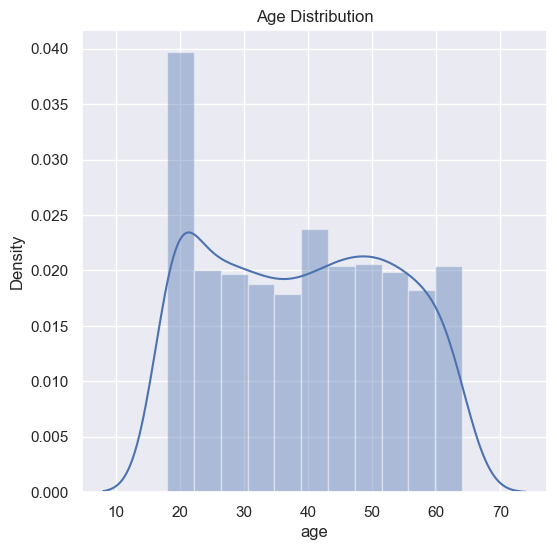

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

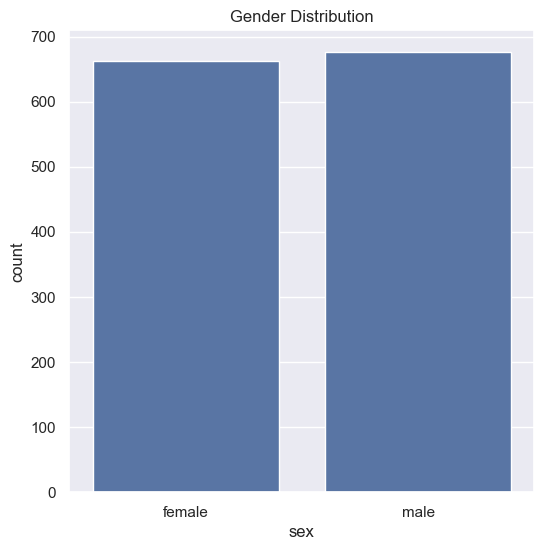

In [8]:
## For categorical data we use count plot 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

In [9]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\1376812171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


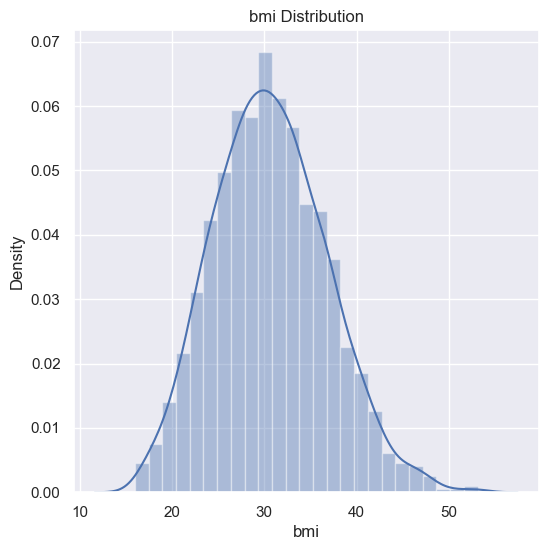

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

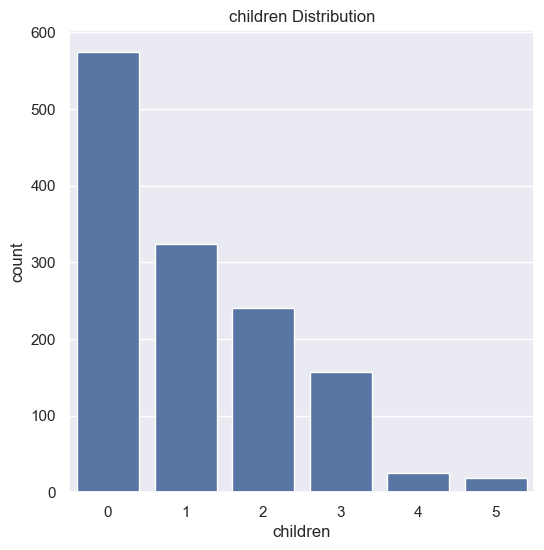

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

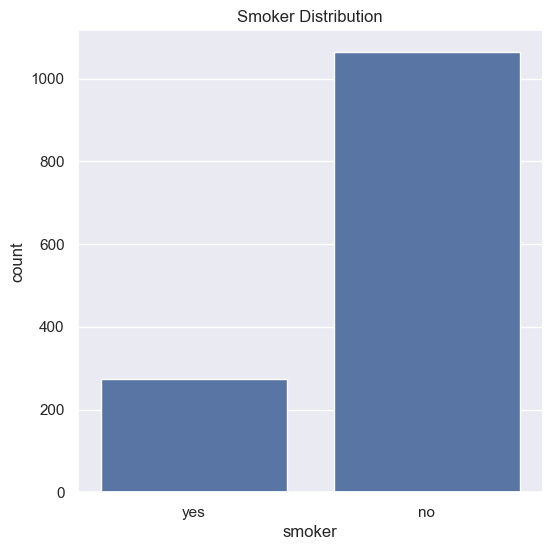

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.show()

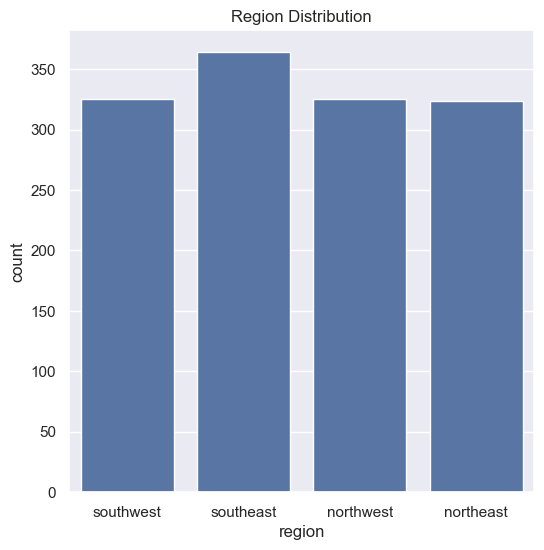

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\663439956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


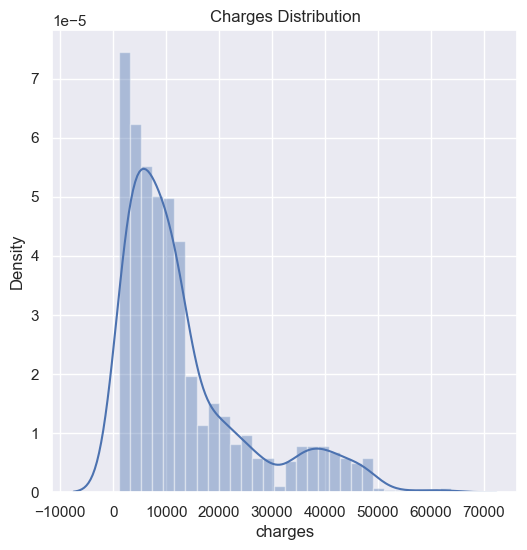

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

## Data pre-processing

#### Converting categorical data to numerical (encoding)

In [16]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\2649889890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\2649889890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_12608\2649889890.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting data into Features and Target

In [18]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [19]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting data into training and test

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Model Training

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [24]:
## Prediction on Training data
training_data_pred=model.predict(x_train)

In [25]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_pred)

In [26]:
r2_train

0.751505643411174

In [27]:
# Prediction testing data
test_data_pred=model.predict(x_test)

In [28]:
# R squared value
r2_test=metrics.r2_score(y_test,test_data_pred)

In [29]:
r2_test

0.7447273869684077

## Building a predictive system

In [30]:
input_data=(31,1,25.74,0,1,0)

# Tuple to numpy array
input_data_np=np.asarray(input_data)

In [31]:
# reshape the array of input
input_data_rs=input_data_np.reshape(1,-1)

In [32]:
prediction =model.predict(input_data_rs)
print(prediction)

[3760.0805765]


c:\Users\Rutuja Navale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
